In [3]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Возраст Морских Ушек

Таблица содержит данные о более 4 тысяч морских ушках (Abalone). 

Для каждой особи указаны ее пол, длина, диаметр, рост, общий вес, очищенный вес, вес внутренностей и вес скорлупы.

Задача - прогнозирование возраста морского ушка(кол-ва колец Rings) на основе физических измерений.

In [4]:
url = "https://raw.githubusercontent.com/DKapustin/Abalone/master/abalone.csv"
data_raw = pd.read_csv(url)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной особи) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [5]:
data_raw.shape

(4177, 9)

Отображаем первые строки таблицы (по умолчанию 5):

In [6]:
data_raw.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Отображаем последние строки таблицы (по умолчанию 5):

In [7]:
data_raw.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Столбцы (признаки) имеют имена

* Sex - пол (I - Infant, F - Female, M - Male)
* Length - длина
* Diameter - диаметр
* Height - высота
* Whole weight - общий вес
* Shucked weight - очищенный вес
* Viscera weight - вес внутренностей
* Shell weight - вес скорлупы
* Rings - кол-во колец

Признак  Sex - номинальный (категориальный), остальные признаки (включая целевой признак Rings) - количественный (числовой).

Требуется предсказать количественный признак Rings по остальным признакам.

Получение имен столбцов:

In [8]:
data_raw.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
data_raw.index

RangeIndex(start=0, stop=4177, step=1)

In [10]:
data_raw['Sex'].dtype

dtype('O')

In [11]:
data_raw['Sex'] = data_raw['Sex'].astype('category')

In [13]:
data_raw['Sex'].dtype

CategoricalDtype(categories=['F', 'I', 'M'], ordered=False)

Рассмотрим зависимость кол-ва колец от длины

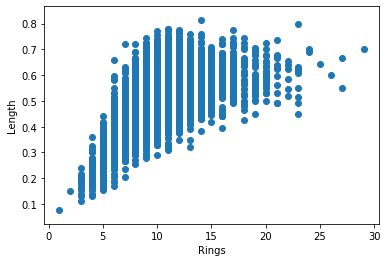

In [14]:
plt.scatter(data_raw['Rings'], data_raw['Length'])
plt.xlabel('Rings')
plt.ylabel('Length')
pass

In [15]:
data_raw['Rings'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     4.0
0.010     4.0
0.050     6.0
0.100     6.0
0.500     9.0
0.900    14.0
0.950    16.0
0.990    20.0
0.995    22.0
Name: Rings, dtype: float64

$99.9\%$ всех значений признака 'Rings' находится в диапазоне от $4$ до $22$ (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

In [16]:
data_raw['Length'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.170
0.010    0.195
0.050    0.295
0.100    0.355
0.500    0.545
0.900    0.660
0.950    0.690
0.990    0.735
0.995    0.750
Name: Length, dtype: float64

$99.9\%$ всех значений 'Length' находится в диапазоне от $0.170$ до $0.750$

In [17]:
rows_to_drop = data_raw[
    (data_raw['Rings'] < data_raw['Rings'].quantile(0.005)) | (data_raw['Rings'] > data_raw['Rings'].quantile(0.995)) | 
    (data_raw['Length']  < data_raw['Length' ].quantile(0.005)) | (data_raw['Length']  > data_raw['Length' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(4118, 9)

In [18]:
rows_to_drop

Int64Index([ 236,  237,  238,  239,  294,  306,  313,  314,  480,  501,  520,
             526,  674,  678,  694,  696,  719,  720,  894, 1052, 1054, 1207,
            1208, 1209, 1428, 1429, 1762, 1763, 1985, 1986, 1987, 2090, 2108,
            2114, 2115, 2169, 2201, 2209, 2305, 2334, 2335, 2371, 2381, 2436,
            2624, 2625, 2711, 3082, 3149, 3280, 3318, 3472, 3521, 3715, 3801,
            3896, 3899, 3902, 4148],
           dtype='int64')

# Визуализация

Сводная информация о признаках 

In [19]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000
mean,0.525200,0.408817,0.139790,0.826830,0.358942,0.180243,0.238231,9.914764
std,0.115975,0.096089,0.040863,0.478936,0.217204,0.107124,0.135941,3.065993
min,0.170000,0.105000,0.000000,0.023500,0.008000,0.000500,0.005000,4.000000
25%,0.450000,0.350000,0.115000,0.446625,0.188000,0.094500,0.130500,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.233500,9.000000
75%,0.615000,0.480000,0.165000,1.149125,0.500875,0.252000,0.325000,11.000000
max,0.750000,0.615000,1.130000,2.825500,1.351000,0.575000,1.005000,22.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Информация о категориальных:

In [21]:
data.describe(include=['category'])

,Sex
count,4118
unique,3
top,M
freq,1506


Диаграмма рассеивания для признаков 'Rings', 'Length'

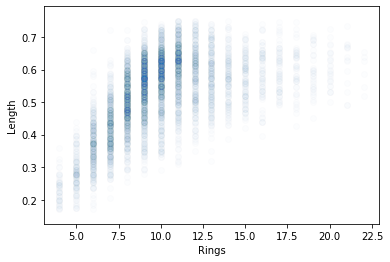

In [23]:
plt.scatter(data['Rings'], data['Length'], alpha=0.01)
plt.xlabel('Rings')
plt.ylabel('Length')
pass

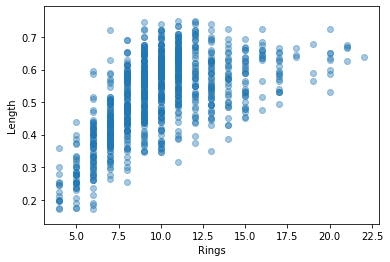

In [24]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['Rings'], data.iloc[random_subset]['Length'], alpha=0.4)
plt.xlabel('Rings')
plt.ylabel('Length')
pass

Диаграмма рассеивания для признаков 'Diameter', 'Length'

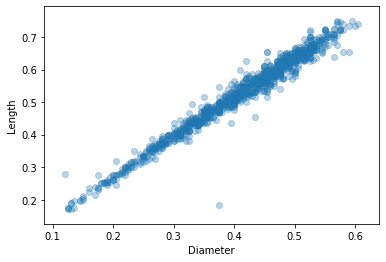

In [25]:
plt.scatter(data.iloc[random_subset]['Diameter'], data.iloc[random_subset]['Length'], alpha = .3)
plt.xlabel('Diameter')
plt.ylabel('Length')
pass

Из рисунка видно, что есть линейная зависимость длины от диаметра

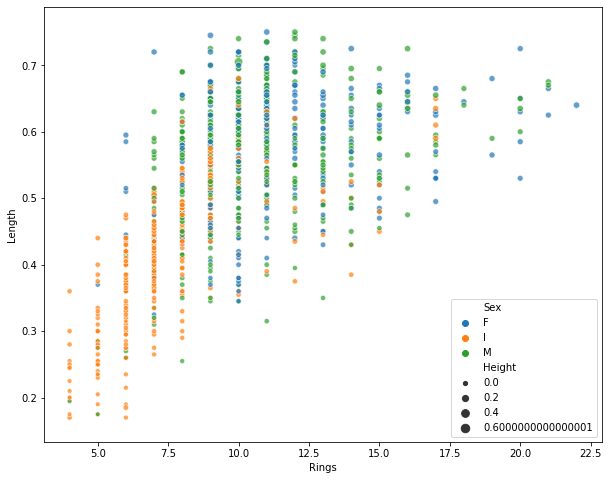

In [26]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Rings', y='Length', size='Height', hue='Sex', data=data.iloc[random_subset], alpha=0.7)
pass

Заметно, что Infant сконцентрированы в нижнем левом углу граффика(что было предсказуемо), однако есть и выбросы, Female и Male распределены примерно одинаково 

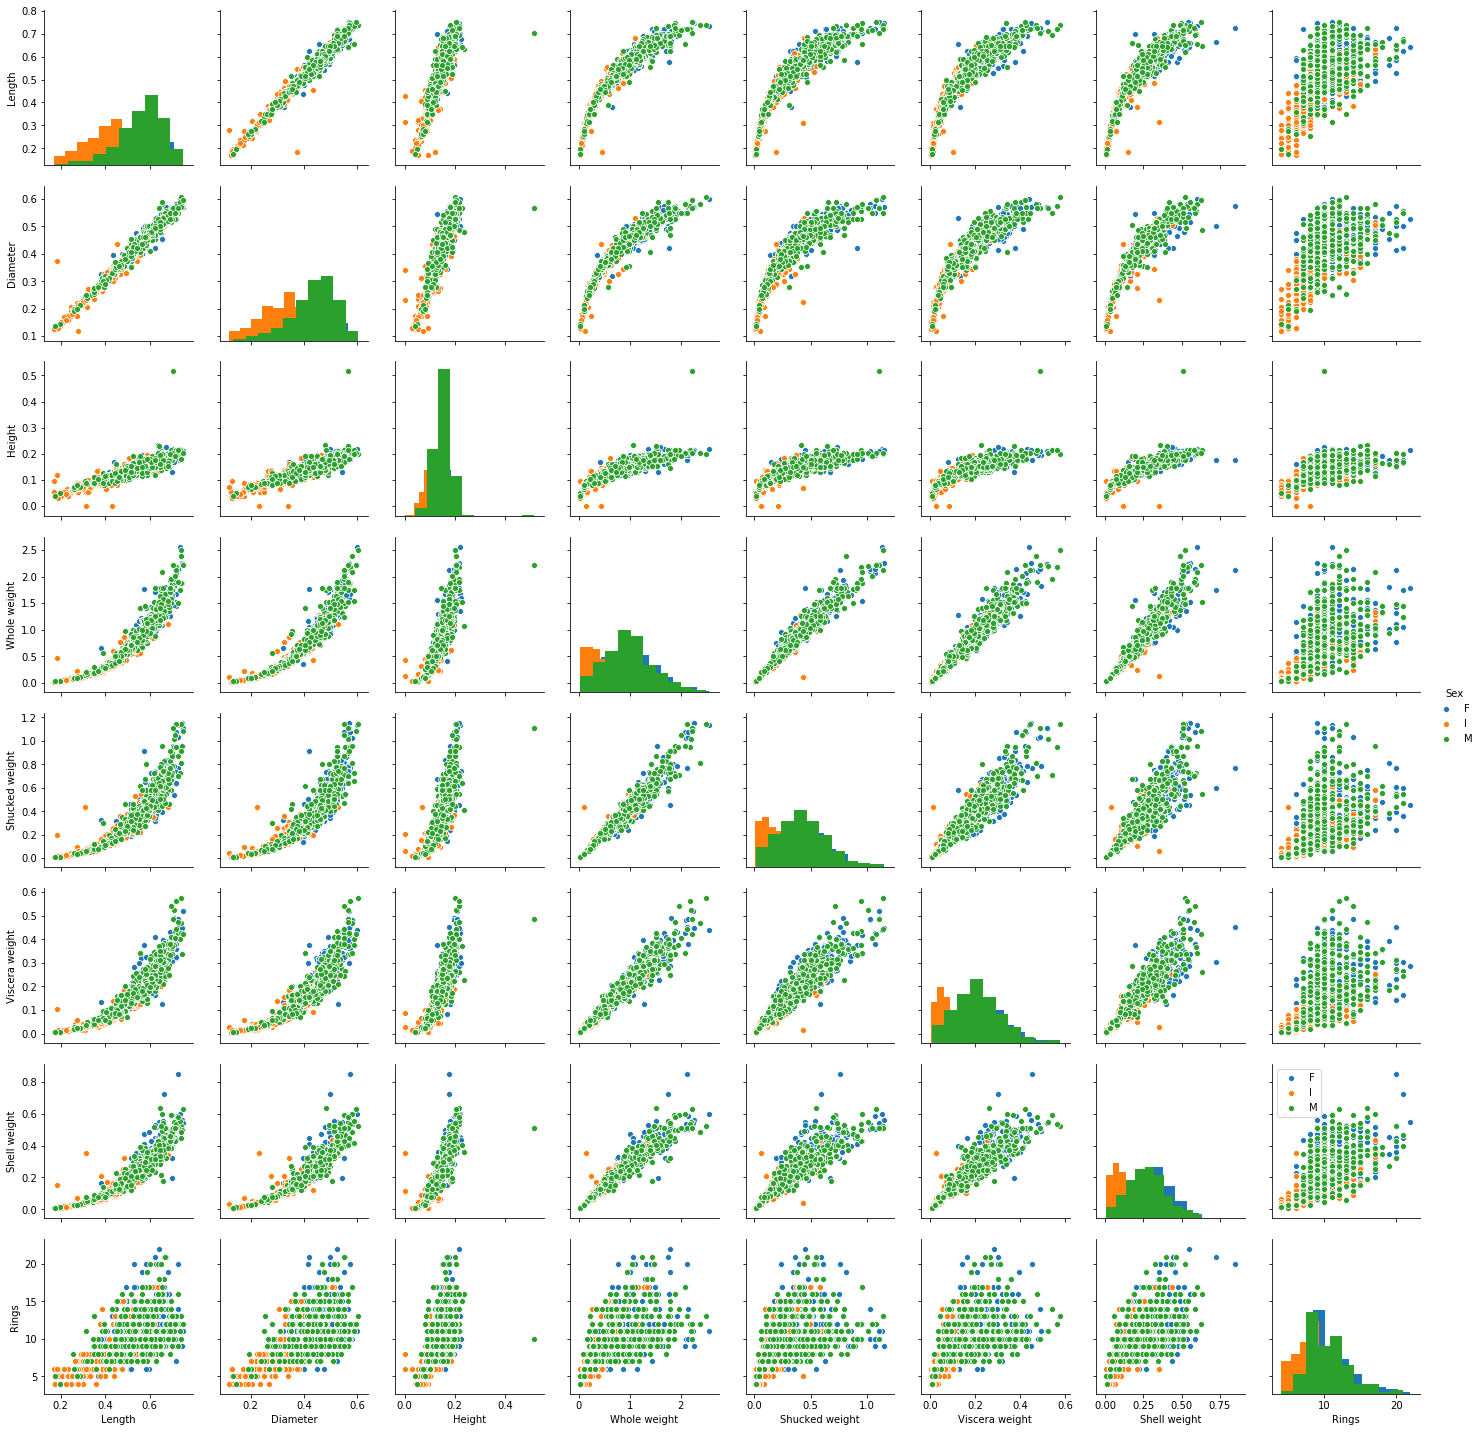

In [27]:
sns.pairplot(data.iloc[random_subset], hue='Sex', diag_kind='hist')
plt.legend()
pass

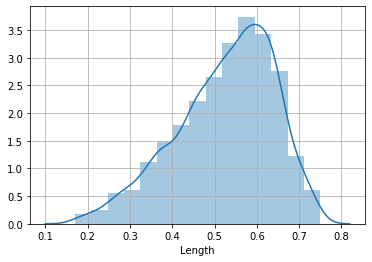

In [28]:
sns.distplot(data['Length'], bins=15)
plt.grid()
pass

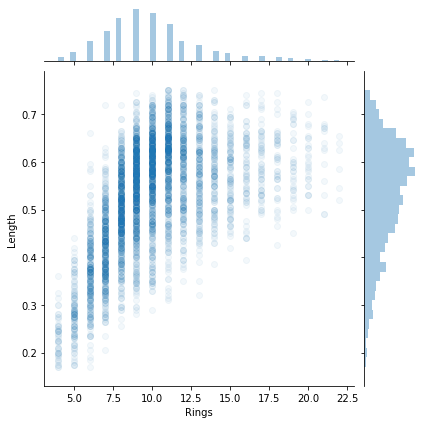

In [29]:
sns.jointplot(x='Rings', y='Length', alpha=.05, data=data)
pass

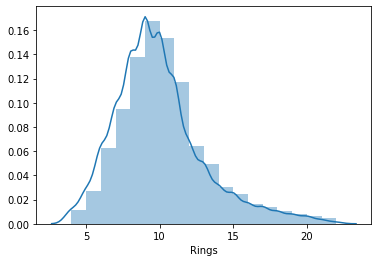

In [30]:
sns.distplot(data['Rings'], bins = 18)
pass

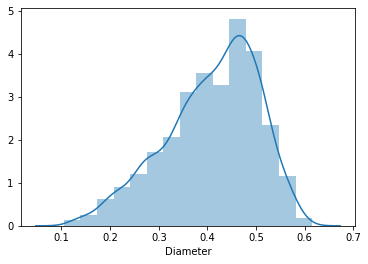

In [31]:
sns.distplot(data['Diameter'], bins = 15)
pass

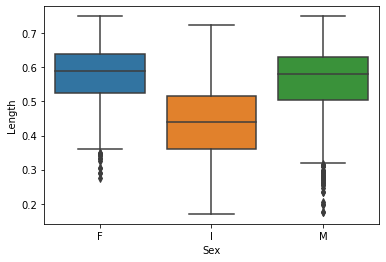

In [32]:
sns.boxplot(x="Sex", y="Length", data=data)
pass

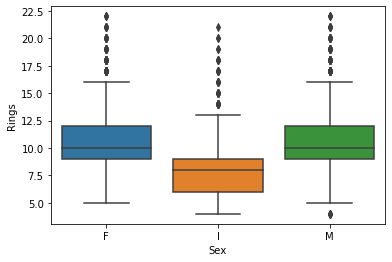

In [33]:
sns.boxplot(x="Sex", y="Rings", data=data)
pass

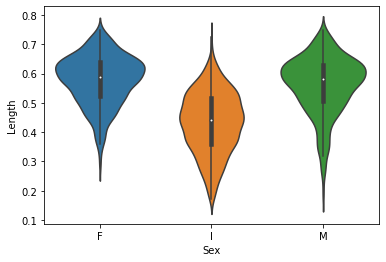

In [34]:
sns.violinplot(x="Sex", y="Length", data=data)
pass


In [35]:
corr_mat = data.corr()
corr_mat

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.985927,0.817540,0.929677,0.902228,0.906977,0.901238,0.549333
Diameter,0.985927,1.000000,0.823879,0.929111,0.896362,0.902781,0.908659,0.568091
Height,0.817540,0.823879,1.000000,0.815836,0.771595,0.795319,0.812698,0.546353
Whole weight,0.929677,0.929111,0.815836,1.000000,0.969066,0.965325,0.955105,0.537052
Shucked weight,0.902228,0.896362,0.771595,0.969066,1.000000,0.929701,0.882074,0.419224
Viscera weight,0.906977,0.902781,0.795319,0.965325,0.929701,1.000000,0.907386,0.503254
Shell weight,0.901238,0.908659,0.812698,0.955105,0.882074,0.907386,1.000000,0.622302
Rings,0.549333,0.568091,0.546353,0.537052,0.419224,0.503254,0.622302,1.000000


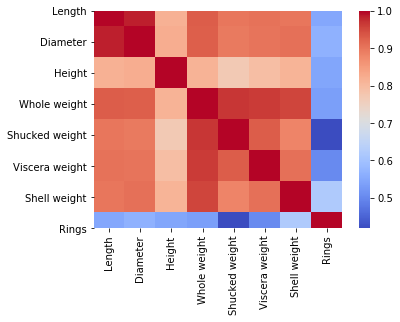

In [36]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [37]:
corr_mat > 0.85

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,True,True,False,True,True,True,True,False
Diameter,True,True,False,True,True,True,True,False
Height,False,False,True,False,False,False,False,False
Whole weight,True,True,False,True,True,True,True,False
Shucked weight,True,True,False,True,True,True,True,False
Viscera weight,True,True,False,True,True,True,True,False
Shell weight,True,True,False,True,True,True,True,False
Rings,False,False,False,False,False,False,False,True


In [39]:
corr_mat.where(np.triu(corr_mat > 0.85, k=1)).stack().sort_values(ascending=False)

Length          Diameter          0.985927
Whole weight    Shucked weight    0.969066
                Viscera weight    0.965325
                Shell weight      0.955105
Shucked weight  Viscera weight    0.929701
Length          Whole weight      0.929677
Diameter        Whole weight      0.929111
                Shell weight      0.908659
Viscera weight  Shell weight      0.907386
Length          Viscera weight    0.906977
Diameter        Viscera weight    0.902781
Length          Shucked weight    0.902228
                Shell weight      0.901238
Diameter        Shucked weight    0.896362
Shucked weight  Shell weight      0.882074
dtype: float64

In [40]:
corr_mat.loc['Length', 'Whole weight'], corr_mat.loc['Length', 'Shucked weight']

(0.929677384014879, 0.9022275346207893)

In [41]:
corr_mat.loc['Length', 'Diameter']

0.9859271419457157

In [40]:
data.loc[(data['Sex']=='M') & (data['Length'] >= 0.6), :]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
28,M,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.295,15
32,M,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18
81,M,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.675,12
86,M,0.625,0.465,0.140,1.1950,0.4825,0.2050,0.400,13
94,M,0.695,0.560,0.190,1.4940,0.5880,0.3425,0.485,15
...,...,...,...,...,...,...,...,...,...
4145,M,0.670,0.525,0.200,1.7405,0.6205,0.2970,0.657,11
4146,M,0.695,0.530,0.210,1.5100,0.6640,0.4095,0.385,10
4147,M,0.695,0.550,0.195,1.6645,0.7270,0.3600,0.445,11
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9


In [42]:
data['Sex'].unique()

[M, F, I]
Categories (3, object): [M, F, I]

In [43]:
data['Sex'].value_counts()

M    1506
I    1319
F    1293
Name: Sex, dtype: int64

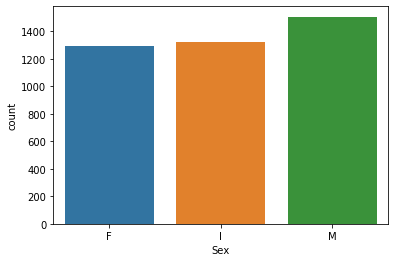

In [44]:
sns.countplot(x='Sex', data=data)
pass

In [45]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Убедились, что пропущенных занчений нет.

In [46]:
data['Sex'] = pd.factorize(data['Sex'])[0]

In [47]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Нормализация

In [48]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [49]:
data_stand.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03
mean,4.185848e-16,-1.540455e-15,-1.479395e-14,2.165868e-14,-4.504626e-15,3.935981e-15,-3.887129e-15,5.702093e-16,6.163113e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.154122e+00,-3.062741e+00,-3.161825e+00,-3.420982e+00,-1.677321e+00,-1.615722e+00,-1.677895e+00,-1.715673e+00,-1.929151e+00
25%,-1.154122e+00,-6.484204e-01,-6.121121e-01,-6.066671e-01,-7.938525e-01,-7.870097e-01,-8.004078e-01,-7.924799e-01,-6.245170e-01
50%,5.490226e-02,1.707240e-01,1.684123e-01,5.140491e-03,-5.654126e-02,-1.056238e-01,-8.628271e-02,-3.479955e-02,-2.983583e-01
75%,1.263926e+00,7.743041e-01,7.407970e-01,6.169480e-01,6.729402e-01,6.534538e-01,6.698497e-01,6.382854e-01,3.539589e-01
max,1.263926e+00,1.938351e+00,2.145741e+00,2.423272e+01,4.173146e+00,4.567394e+00,3.685044e+00,5.640447e+00,3.941704e+00


# Классификация

In [50]:
X = data.drop('Rings', axis = 1) # выбрасываем столбец 'Rings'
y = data['Rings']
feature_names = X.columns

In [51]:
type(feature_names)

pandas.core.indexes.base.Index

In [52]:
feature_names

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [53]:
X = X.to_numpy()

In [54]:
y = np.array(y != 12, dtype='int')

In [55]:
y

array([1, 1, 1, ..., 1, 1, 0])

In [56]:
print(X.shape)
print(y.shape)
N, d = X.shape

(4118, 8)
(4118,)


Разобьем данные на обучающую и тестовую выборку 

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2882 1236


Метод К ближайших соседей (с числом соседей: 2,3,5,7,10,15,20,50,100,1000)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([2,3,5,7,10,15,20,50,100,1000])
for i in range (10):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    y_train_predict = knn.predict(X_train)
    err_train  = np.mean(y_train  != y_train_predict)
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    i=i+1

neighbours = 2 err_train = 0.059333795975017346 err_test = 0.16747572815533981
neighbours = 3 err_train = 0.060027758501040945 err_test = 0.07928802588996764
neighbours = 5 err_train = 0.06419153365718251 err_test = 0.059870550161812294
neighbours = 7 err_train = 0.06870229007633588 err_test = 0.06067961165048544
neighbours = 10 err_train = 0.0669673837612769 err_test = 0.05663430420711974
neighbours = 15 err_train = 0.06731436502428868 err_test = 0.055825242718446605
neighbours = 20 err_train = 0.06731436502428868 err_test = 0.055825242718446605
neighbours = 50 err_train = 0.06731436502428868 err_test = 0.055825242718446605
neighbours = 100 err_train = 0.06731436502428868 err_test = 0.055825242718446605
neighbours = 1000 err_train = 0.06731436502428868 err_test = 0.055825242718446605


С увеличением числа соседей ошибка на тренировочной выборке (err_train) увеличивается, а на тестовой (err_test) уменьшается.

Начиная с 15 соседей, показатели не изменются